In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ticker = ['PTT.BK']
data = yf.download(tickers=ticker,start='2021-01-01', end='2022-09-01',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400
...,...,...,...,...,...,...
2022-08-25,37.75,38.00,37.50,37.75,36.414627,42514900
2022-08-26,37.75,38.00,37.50,38.00,36.655781,35083300
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600


In [9]:
df= data.copy()

In [10]:
df= df.asfreq('D').fillna(method='ffill')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0
...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0


In [11]:
df.High.rolling(window=52*7).max()

Date
2021-01-04      NaN
2021-01-05      NaN
2021-01-06      NaN
2021-01-07      NaN
2021-01-08      NaN
              ...  
2022-08-27    41.25
2022-08-28    41.25
2022-08-29    41.25
2022-08-30    41.25
2022-08-31    41.25
Freq: D, Name: High, Length: 605, dtype: float64

In [13]:
df['52w_high'] = df.High.rolling(window=52*7).max()
df


,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low
Date,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,40.5
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,40.5
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,40.5


In [18]:
df['52w_low'] = df.Low.rolling(window=52*7).min()


In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low
Date,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75


<AxesSubplot:xlabel='Date'>

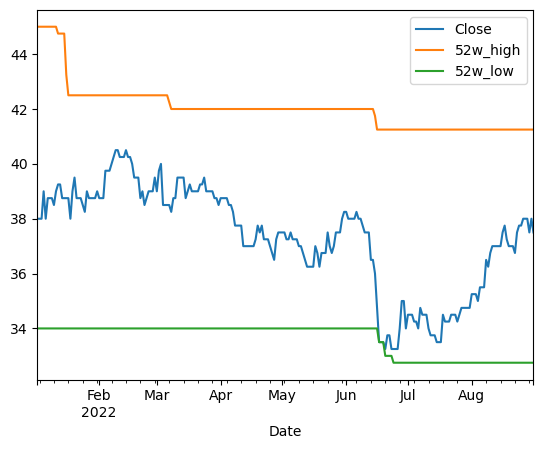

In [20]:
df.dropna().plot(y=['Close','52w_high','52w_low'])

# about 29 feb

In [21]:
pd.to_datetime('2020-02-29') - pd.DateOffset(years=1)

Timestamp('2019-02-28 00:00:00')

In [22]:
pd.to_datetime('2020-02-29') + pd.DateOffset(years=1)

Timestamp('2021-02-28 00:00:00')

In [23]:
pd.to_datetime('2021-02-29') - pd.DateOffset(years=1)
# when year don't have 29 feb

ParserError: day is out of range for month: 2021-02-29

In [24]:
pd.to_datetime('2021-02-28') - pd.DateOffset(weeks=52)

# this will help the weeks =52 will fix this problem with fillna

Timestamp('2020-03-01 00:00:00')

In [25]:
pd.to_datetime('2021-02-28') - pd.DateOffset(days=365)

Timestamp('2020-02-29 00:00:00')

In [26]:
data.index[-1].strftime('%a')

'Wed'

In [27]:
df2 = data.resample('W-WED').agg({'Open':'first',
                            'High':'max',
                            'Low':'min',
                            'Close':'last'}).dropna()

In [28]:
len(df2.iloc[-52:])

52

In [30]:
df2.High.max()

45.0

# Calculate scale

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low
Date,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75


In [32]:
   #add range # min-max scaler
df['range'] = df['52w_high'] - df['52w_low']
df

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range
Date,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5


In [33]:
df['scale_price'] = (df['Close'] - df['52w_low']) / df['range']
df

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price
Date,,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5,0.558824


<AxesSubplot:xlabel='Date'>

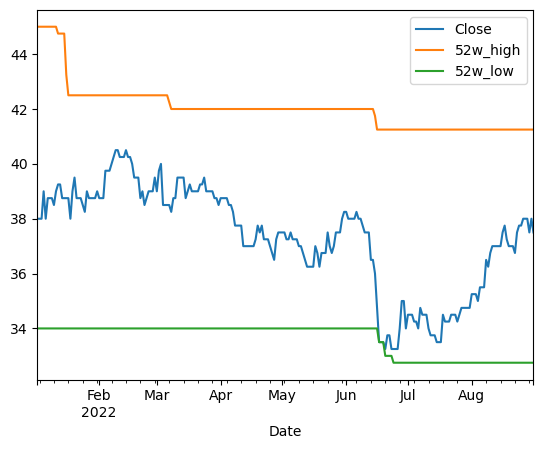

In [34]:
df.dropna().plot(y=['Close','52w_high','52w_low'])#.legend(bbox_to_anchor=(1.0, 0.4))

<AxesSubplot:xlabel='Date'>

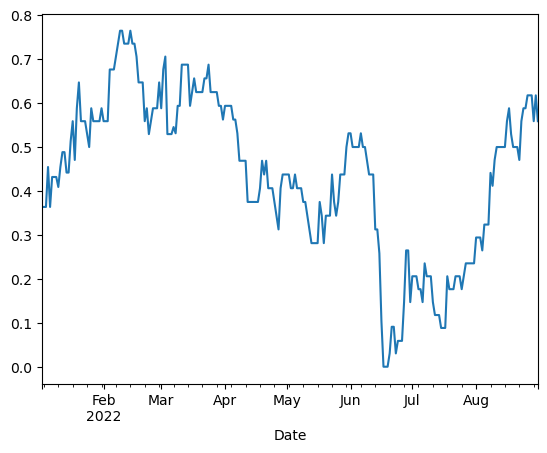

In [35]:
df.dropna().scale_price.plot()
# scale for use analyst what every later

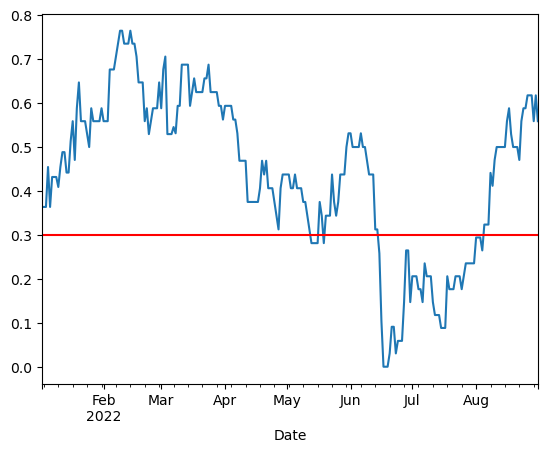

In [36]:
df.dropna().scale_price.plot()
plt.axhline(0.3,color='red')

In [37]:
df[df['scale_price']>= 0.3]
# for filter

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price
Date,,,,,,,,,,
2022-01-02,38.50,38.50,38.00,38.0,35.918053,45388600.0,45.00,34.00,11.0,0.363636
2022-01-03,38.50,38.50,38.00,38.0,35.918053,45388600.0,45.00,34.00,11.0,0.363636
2022-01-04,38.25,38.50,38.00,38.0,35.918053,59500200.0,45.00,34.00,11.0,0.363636
2022-01-05,38.25,39.00,38.00,39.0,36.863266,76590500.0,45.00,34.00,11.0,0.454545
2022-01-06,39.00,39.00,38.00,38.0,35.918053,71677600.0,45.00,34.00,11.0,0.363636
...,...,...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.0,36.655781,35083300.0,41.25,32.75,8.5,0.617647
2022-08-28,37.75,38.00,37.50,38.0,36.655781,35083300.0,41.25,32.75,8.5,0.617647
2022-08-29,37.50,37.75,37.00,37.5,36.173470,64898600.0,41.25,32.75,8.5,0.558824


In [38]:
df['drop_from_high'] = df['Close'] / df['52w_high'] -1

# drawndown 1 y data

<AxesSubplot:xlabel='Date'>

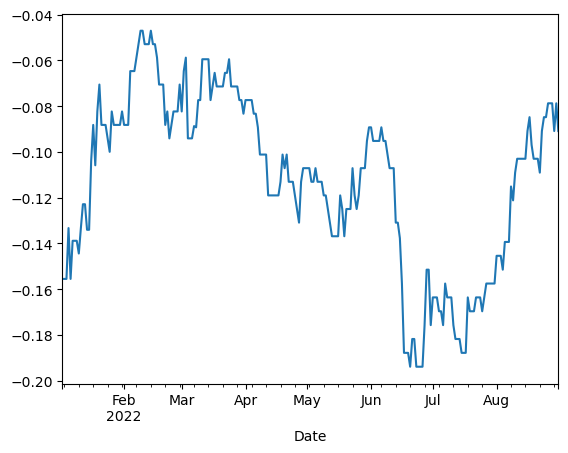

In [39]:
df.dropna().drop_from_high.plot()
#1y drawdown window

# generate signal from this

In [40]:
df

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high
Date,,,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN,NaN,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN,NaN,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN,NaN,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN,NaN,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5,0.558824,-0.090909


In [41]:
df['scale_price'].rolling(10).mean()


Date
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
                ...   
2022-08-27    0.547059
2022-08-28    0.555882
2022-08-29    0.561765
2022-08-30    0.573529
2022-08-31    0.579412
Freq: D, Name: scale_price, Length: 605, dtype: float64

In [42]:
df['drop_from_high'].rolling(10).mean()


Date
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
                ...   
2022-08-27   -0.093333
2022-08-28   -0.091515
2022-08-29   -0.090303
2022-08-30   -0.087879
2022-08-31   -0.086667
Freq: D, Name: drop_from_high, Length: 605, dtype: float64

In [43]:
df['5d_ema'] = df['Close'].ewm(span=5,adjust=False,min_periods=5).mean()
df

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema
Date,,,,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN,NaN,NaN,42.570988
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788,37.770299
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788,37.846866
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5,0.558824,-0.090909,37.731244


In [44]:
#filter condition
#close > 5d ema ??  &  drop from high 10% at least

df['trend'] = df['Close'] > df['5d_ema']

In [45]:
df['trend'] 

Date
2021-01-04    False
2021-01-05    False
2021-01-06    False
2021-01-07    False
2021-01-08     True
              ...  
2022-08-27     True
2022-08-28     True
2022-08-29    False
2022-08-30     True
2022-08-31    False
Freq: D, Name: trend, Length: 605, dtype: bool

In [46]:
df.loc[df['trend'] != df['trend'].shift()]
#check trend is change 

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend
Date,,,,,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN,NaN,NaN,42.570988,True
2021-01-15,44.25,44.75,43.00,43.25,38.875763,124773600.0,NaN,NaN,NaN,NaN,NaN,43.558453,False
2021-02-01,37.50,39.25,37.00,39.25,35.280315,161452500.0,NaN,NaN,NaN,NaN,NaN,38.559474,True
2021-02-03,39.25,39.50,38.00,38.25,34.381458,103367800.0,NaN,NaN,NaN,NaN,NaN,38.498655,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-18,37.50,37.75,37.00,37.25,35.932312,45521500.0,41.25,32.75,8.5,0.529412,-0.096970,37.292576,False
2022-08-23,36.75,37.75,36.75,37.50,36.173470,47634400.0,41.25,32.75,8.5,0.558824,-0.090909,37.149640,True
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5,0.558824,-0.090909,37.731244,False


In [47]:
df.loc[df['trend'] != df['trend'].shift(),'ema_signal'] = True
# craete signal

In [48]:
df[df['ema_signal']==True]


,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend,ema_signal
Date,,,,,,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN,NaN,NaN,42.570988,True,True
2021-01-15,44.25,44.75,43.00,43.25,38.875763,124773600.0,NaN,NaN,NaN,NaN,NaN,43.558453,False,True
2021-02-01,37.50,39.25,37.00,39.25,35.280315,161452500.0,NaN,NaN,NaN,NaN,NaN,38.559474,True,True
2021-02-03,39.25,39.50,38.00,38.25,34.381458,103367800.0,NaN,NaN,NaN,NaN,NaN,38.498655,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-18,37.50,37.75,37.00,37.25,35.932312,45521500.0,41.25,32.75,8.5,0.529412,-0.096970,37.292576,False,True
2022-08-23,36.75,37.75,36.75,37.50,36.173470,47634400.0,41.25,32.75,8.5,0.558824,-0.090909,37.149640,True,True
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5,0.558824,-0.090909,37.731244,False,True


In [49]:
df.loc[df['trend'] != df['trend'].shift(),'ema_signal'] = True

In [50]:
df[df['ema_signal']==True]

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend,ema_signal
Date,,,,,,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN,NaN,NaN,42.570988,True,True
2021-01-15,44.25,44.75,43.00,43.25,38.875763,124773600.0,NaN,NaN,NaN,NaN,NaN,43.558453,False,True
2021-02-01,37.50,39.25,37.00,39.25,35.280315,161452500.0,NaN,NaN,NaN,NaN,NaN,38.559474,True,True
2021-02-03,39.25,39.50,38.00,38.25,34.381458,103367800.0,NaN,NaN,NaN,NaN,NaN,38.498655,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-18,37.50,37.75,37.00,37.25,35.932312,45521500.0,41.25,32.75,8.5,0.529412,-0.096970,37.292576,False,True
2022-08-23,36.75,37.75,36.75,37.50,36.173470,47634400.0,41.25,32.75,8.5,0.558824,-0.090909,37.149640,True,True
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5,0.558824,-0.090909,37.731244,False,True


In [51]:
df.loc[(df['ema_signal']==True) & (df['drop_from_high']>=-0.10) & (df['trend'])] 

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend,ema_signal
Date,,,,,,,,,,,,,,
2022-01-19,38.25,39.25,38.25,39.00,36.863266,94167200.0,42.50,34.00,8.5,0.588235,-0.082353,38.689428,True,True
2022-01-26,38.50,39.00,38.25,39.00,36.863266,51285800.0,42.50,34.00,8.5,0.588235,-0.082353,38.703588,True,True
2022-02-04,39.00,40.00,39.00,39.75,37.572174,107894100.0,42.50,34.00,8.5,0.676471,-0.064706,39.098587,True,True
2022-02-25,39.00,39.25,38.75,39.00,36.863266,39802200.0,42.50,34.00,8.5,0.588235,-0.082353,38.946633,True,True
2022-03-02,39.75,40.25,39.25,39.75,37.572174,100744400.0,42.50,34.00,8.5,0.676471,-0.064706,39.317046,True,True
2022-03-09,38.50,38.75,38.00,38.75,37.379250,81740400.0,42.00,34.00,8.0,0.593750,-0.077381,38.619493,True,True
2022-03-17,39.25,39.50,39.00,39.25,37.861565,54709700.0,42.00,34.00,8.0,0.656250,-0.065476,39.145457,True,True
2022-03-22,38.75,39.75,38.75,39.25,37.861565,89193800.0,42.00,34.00,8.0,0.656250,-0.065476,39.102488,True,True
2022-08-23,36.75,37.75,36.75,37.50,36.173470,47634400.0,41.25,32.75,8.5,0.558824,-0.090909,37.149640,True,True


In [52]:
#add ema 12 for check 
df['12d_ema'] = df['Close'].ewm(span=12,adjust=False,min_periods=12).mean()
df

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend,ema_signal,12d_ema
Date,,,,,,,,,,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True,NaN
2021-01-05,42.25,42.50,41.25,42.00,37.752190,75867500.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2021-01-06,43.00,43.50,42.50,42.75,38.426334,88565400.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2021-01-08,42.75,43.50,42.00,42.75,38.426334,83698400.0,NaN,NaN,NaN,NaN,NaN,42.570988,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788,37.770299,True,NaN,37.423625
2022-08-28,37.75,38.00,37.50,38.00,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788,37.846866,True,NaN,37.512298
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600.0,41.25,32.75,8.5,0.558824,-0.090909,37.731244,False,True,37.510406


In [53]:
df.loc[(df['ema_signal']==True) & (df['drop_from_high']>=-0.10) & (df['trend']) & (df['5d_ema'] > df['12d_ema'])] 

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend,ema_signal,12d_ema
Date,,,,,,,,,,,,,,,
2022-01-19,38.25,39.25,38.25,39.00,36.863266,94167200.0,42.50,34.00,8.5,0.588235,-0.082353,38.689428,True,True,38.669459
2022-02-04,39.00,40.00,39.00,39.75,37.572174,107894100.0,42.50,34.00,8.5,0.676471,-0.064706,39.098587,True,True,38.915373
2022-03-02,39.75,40.25,39.25,39.75,37.572174,100744400.0,42.50,34.00,8.5,0.676471,-0.064706,39.317046,True,True,39.283506
2022-03-17,39.25,39.50,39.00,39.25,37.861565,54709700.0,42.00,34.00,8.0,0.656250,-0.065476,39.145457,True,True,39.102975
2022-03-22,38.75,39.75,38.75,39.25,37.861565,89193800.0,42.00,34.00,8.0,0.656250,-0.065476,39.102488,True,True,39.083128
2022-08-23,36.75,37.75,36.75,37.50,36.173470,47634400.0,41.25,32.75,8.5,0.558824,-0.090909,37.149640,True,True,36.974808
2022-08-30,37.50,38.00,37.50,38.00,36.655781,49033400.0,41.25,32.75,8.5,0.617647,-0.078788,37.820829,True,True,37.585728


In [54]:
#df.loc[(df['ema_signal']==True) & (df['drop_from_high']>=-0.10) & (df['trend']) & (df['5d_ema'] > df['12d_ema']) , 'action'] = 'buy'
df.loc[(df['ema_signal']==True) & (df['drop_from_high']>=-0.10) & (df['trend']) & (df['5d_ema'] > df['12d_ema']), 'marker_position'] = df['Low'] *0.98

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


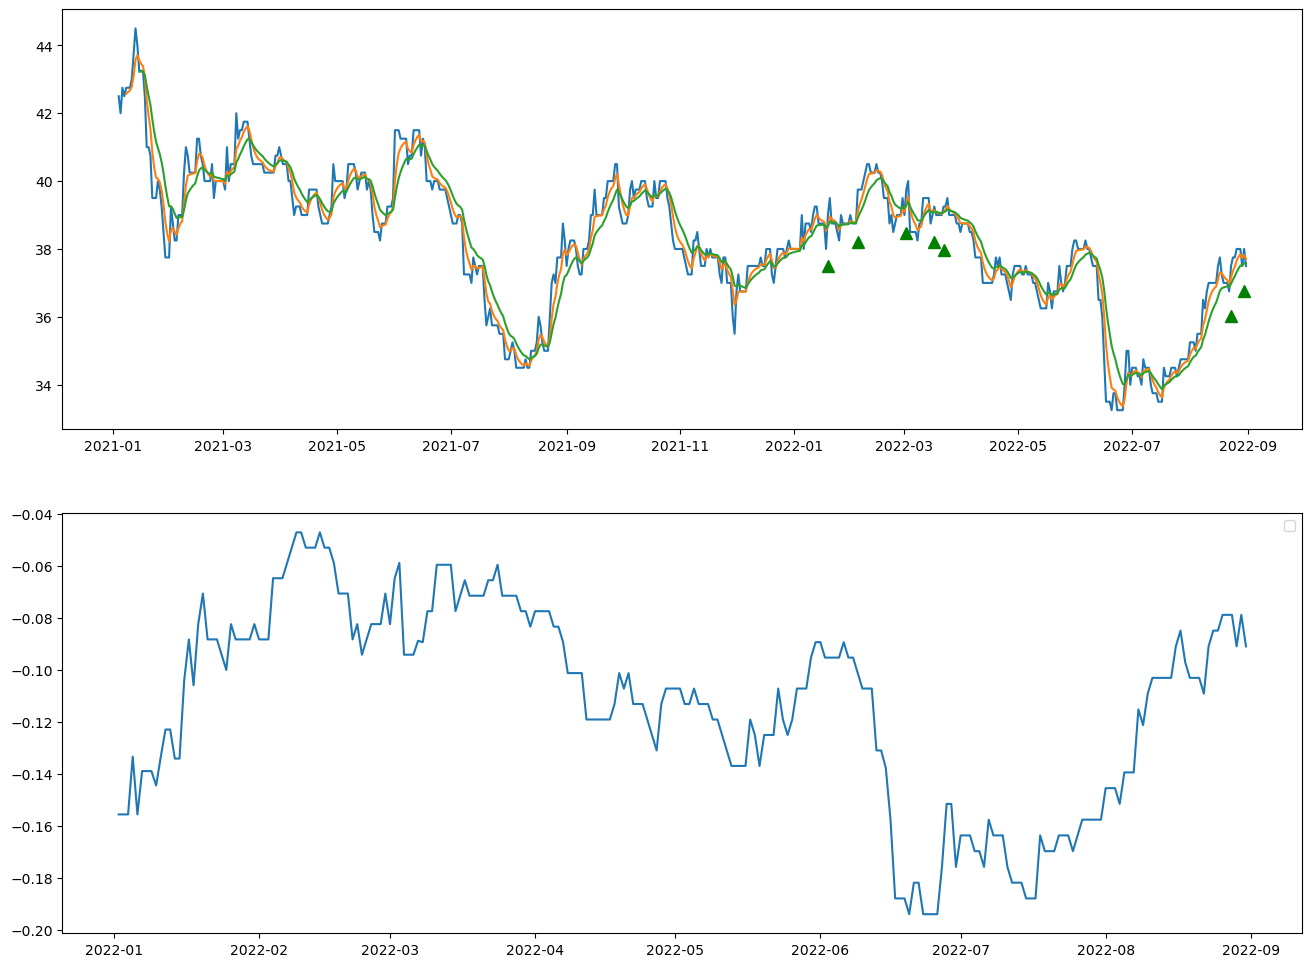

In [56]:
fig, axs = plt.subplots(2,figsize=(16,12))

axs[0].plot(df[['Close','5d_ema','12d_ema']])
axs[0].plot(df.marker_position, 'g^', markersize=8)

axs[1].plot(df['drop_from_high'])

plt.legend()


In [57]:
df[df['marker_position']>0]

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend,ema_signal,12d_ema,marker_position
Date,,,,,,,,,,,,,,,,
2022-01-19,38.25,39.25,38.25,39.00,36.863266,94167200.0,42.50,34.00,8.5,0.588235,-0.082353,38.689428,True,True,38.669459,37.485
2022-02-04,39.00,40.00,39.00,39.75,37.572174,107894100.0,42.50,34.00,8.5,0.676471,-0.064706,39.098587,True,True,38.915373,38.220
2022-03-02,39.75,40.25,39.25,39.75,37.572174,100744400.0,42.50,34.00,8.5,0.676471,-0.064706,39.317046,True,True,39.283506,38.465
2022-03-17,39.25,39.50,39.00,39.25,37.861565,54709700.0,42.00,34.00,8.0,0.656250,-0.065476,39.145457,True,True,39.102975,38.220
2022-03-22,38.75,39.75,38.75,39.25,37.861565,89193800.0,42.00,34.00,8.0,0.656250,-0.065476,39.102488,True,True,39.083128,37.975
2022-08-23,36.75,37.75,36.75,37.50,36.173470,47634400.0,41.25,32.75,8.5,0.558824,-0.090909,37.149640,True,True,36.974808,36.015
2022-08-30,37.50,38.00,37.50,38.00,36.655781,49033400.0,41.25,32.75,8.5,0.617647,-0.078788,37.820829,True,True,37.585728,36.750


In [58]:
df[df['drop_from_high']<0]

,Open,High,Low,Close,Adj Close,Volume,52w_high,52w_low,range,scale_price,drop_from_high,5d_ema,trend,ema_signal,12d_ema,marker_position
Date,,,,,,,,,,,,,,,,
2022-01-02,38.50,38.50,38.00,38.0,35.918053,45388600.0,45.00,34.00,11.0,0.363636,-0.155556,38.002881,False,NaN,37.924754,NaN
2022-01-03,38.50,38.50,38.00,38.0,35.918053,45388600.0,45.00,34.00,11.0,0.363636,-0.155556,38.001921,False,NaN,37.936330,NaN
2022-01-04,38.25,38.50,38.00,38.0,35.918053,59500200.0,45.00,34.00,11.0,0.363636,-0.155556,38.001281,False,NaN,37.946125,NaN
2022-01-05,38.25,39.00,38.00,39.0,36.863266,76590500.0,45.00,34.00,11.0,0.454545,-0.133333,38.334187,True,True,38.108260,NaN
2022-01-06,39.00,39.00,38.00,38.0,35.918053,71677600.0,45.00,34.00,11.0,0.363636,-0.155556,38.222791,False,True,38.091605,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,37.75,38.00,37.50,38.0,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788,37.770299,True,NaN,37.423625,NaN
2022-08-28,37.75,38.00,37.50,38.0,36.655781,35083300.0,41.25,32.75,8.5,0.617647,-0.078788,37.846866,True,NaN,37.512298,NaN
2022-08-29,37.50,37.75,37.00,37.5,36.173470,64898600.0,41.25,32.75,8.5,0.558824,-0.090909,37.731244,False,True,37.510406,NaN


In [59]:
df=df.loc['2022-01-02':]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


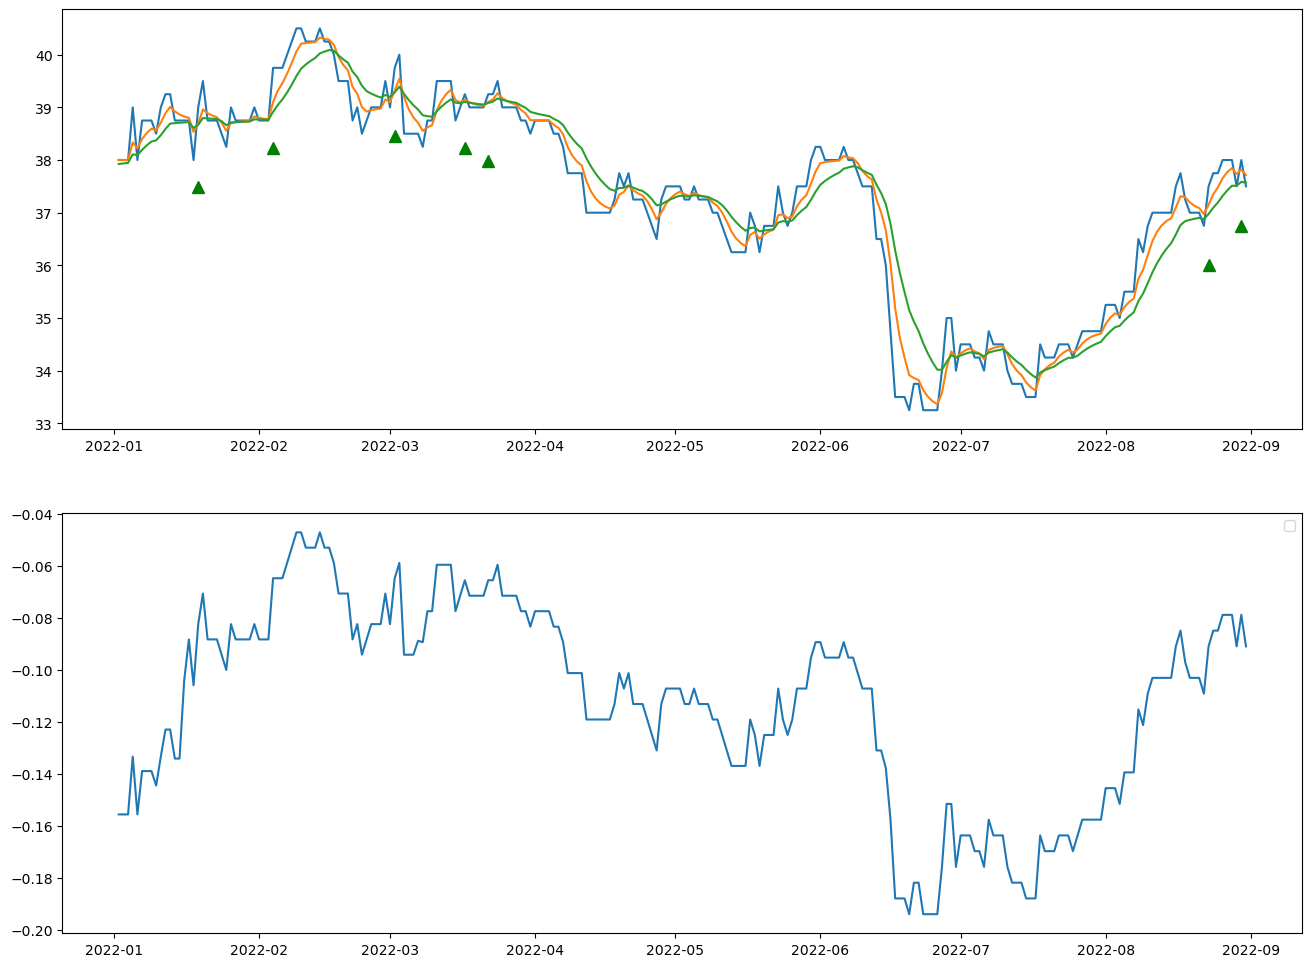

In [60]:
fig, axs = plt.subplots(2,figsize=(16,12))

axs[0].plot(df[['Close','5d_ema','12d_ema']])
axs[0].plot(df.marker_position, 'g^', markersize=8)

axs[1].plot(df['drop_from_high'])

plt.legend()